In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [4]:
# Check for missing values
covid.isnull().sum()
# There are missing values in the state but that is ok since we won't be using that

SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
# Datetime format (ObservationDate is initially of object type)
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [6]:
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,2020-09-23,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,2020-09-23,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,2020-09-23,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,2020-09-23,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [9]:
# we want to group by the observation date 
covid_datewise = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
covid_datewise

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0
2020-09-20,30935011.0,959565.0,21159459.0
2020-09-21,31245797.0,963693.0,21394593.0


In [11]:
# Suppose we want to check the active number of cases 
covid_datewise['Active'] = covid_datewise['Confirmed'] - covid_datewise['Recovered']

**Visualisation of Covid Cases** 

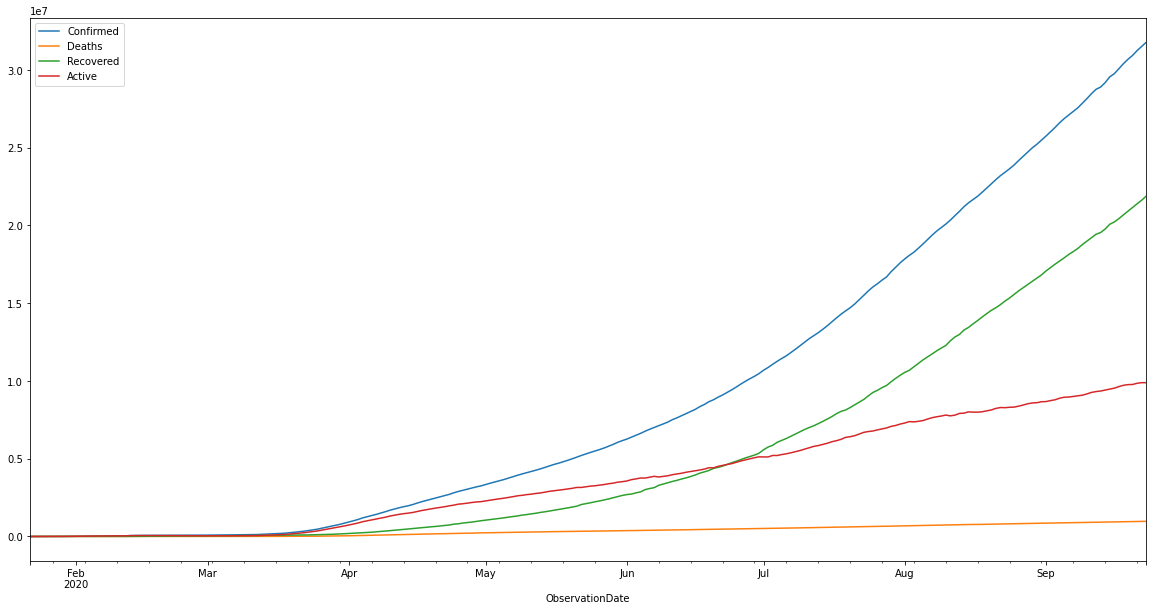

In [15]:
# Let's plot all the data 
covid_datewise.plot(figsize = (20,10))
plt.show()
# Note how the x-axis is automatically datetime

In [16]:
# We can plot a nicer graph 
from plotly.offline import iplot, init_notebook_mode 
import cufflinks  # for transformation of the 
cufflinks.go_offline(connected = True)

In [17]:
# We need to define a special function to view the following graph on Colab
# this is because it needs some javascript input
# On jupyter it would be fine
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))


In [19]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise.iplot(title = 'Total number of cases of Covid19')

In [20]:
# Suppose we want the daily confirmed cases
covid_datewise['Daily Confirmed'] = covid_datewise['Confirmed'].diff()
covid_datewise

,Confirmed,Deaths,Recovered,Active,Daily Confirmed
ObservationDate,,,,,
2020-01-22,555.0,17.0,28.0,527.0,NaN
2020-01-23,653.0,18.0,30.0,623.0,98.0
2020-01-24,941.0,26.0,36.0,905.0,288.0
2020-01-25,1438.0,42.0,39.0,1399.0,497.0
2020-01-26,2118.0,56.0,52.0,2066.0,680.0
...,...,...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0,9765961.0,281953.0
2020-09-20,30935011.0,959565.0,21159459.0,9775552.0,246861.0
2020-09-21,31245797.0,963693.0,21394593.0,9851204.0,310786.0


In [21]:
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise['Daily Confirmed'].iplot(title = 'Daily confirmed cases of Covid19')

In [23]:
# The daily active cases
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_datewise['Active'].iplot(title = 'active cases of Covid19')

**Covid19 - India Analysis**

In [24]:
# Pull out India data
covid_data = covid[covid['Country/Region'] == 'India']
covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,2020-01-30,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,2020-02-01,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,2020-02-02,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,2020-02-03,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116733,116734,2020-09-23,Tripura,India,2020-09-24 04:23:38,23338.0,253.0,16486.0
116747,116748,2020-09-23,Unknown,India,2020-09-24 04:23:38,0.0,0.0,0.0
116756,116757,2020-09-23,Uttar Pradesh,India,2020-09-24 04:23:38,364543.0,5212.0,296183.0
116757,116758,2020-09-23,Uttarakhand,India,2020-09-24 04:23:38,42651.0,512.0,30308.0


In [26]:
# group by date again
covid_india = covid_data.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
covid_india

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0
...,...,...,...
2020-09-19,5308014.0,85619.0,4208431.0
2020-09-20,5400619.0,86752.0,4303043.0
2020-09-21,5487580.0,87882.0,4396399.0


In [27]:
# Plot the data
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_india.iplot(title = 'Total number of cases of Covid19 (India)')

In [28]:
# Plot the daily confirmed cases 
configure_plotly_browser_state()
init_notebook_mode(connected = True)
covid_india['Confirmed'].diff().iplot(title = 'Confirmed Cases of Covid19 in India Daywise')

In [30]:
# We notice some large peaks and troughs which suggest bad reporting of cases
# One could find a way of smoothing the data to make it more realistic

**LSTM Model**

In [31]:
# import packages
import keras 
from keras.models import Sequential
from keras.layers import LSTM, Dense 
from keras.layers import Dropout 

# Process 
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
# We will be trying to predict confirmed number of cases
# The date/day is the parameter

# We will first reset the indices to 1,2,3,4,...
covid_india.reset_index(inplace = True)

In [36]:
# We need to drop the observation dates, deaths and recovered
covid_data = covid_india.drop(['ObservationDate','Deaths','Recovered'],axis = 1)
covid_data # here feature is number of days

,Confirmed
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
233,5308014.0
234,5400619.0
235,5487580.0
236,5562663.0


**Train and Test**

In [39]:
# Train and test in Time Series Forecasting should not be split with random sampling 
# We shouldn't use any cross validation either 
# We need to split the data by time 

# Split data in 80-90% off for train
# Take rest for validation/test

train_data = covid_data[:-5]
test_data = covid_data[-5:]

,Confirmed
233,5308014.0
234,5400619.0
235,5487580.0
236,5562663.0
237,5646010.0


**Data Preprocessing**

In [40]:
# We have to rescale the data since the first and last values are very different values 
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_data)

MinMaxScaler(copy = True, feature_range = (0,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**LSTM Model**

In Time Series Forecasting
* Y = Confirmed cases
* X = Time Series Generator

In [42]:
# number of inputs
n_inputs = 5
# number of features 
n_features = 1

generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length = n_inputs, batch_size = 5)

In [67]:
def build_model():
  lstm_model = Sequential() 

  # Layer 1
  lstm_model.add(LSTM(units = 64,
                      return_sequences = True,
                      input_shape = (n_inputs, n_features)))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 2
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 3
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.2))  # to avoid over fitting 

  # Layer 3
  lstm_model.add(LSTM(units = 128,
                      return_sequences = True))
  lstm_model.add(Dropout(0.5))  # to avoid over fitting

  # output layer
  lstm_model.add(LSTM(units = 1))

  # compile
  lstm_model.compile(optimizer = 'Adam',
                     loss = 'mean_squared_error',
                     metrics = ['mean_squared_error','mean_absolute_error'])
  
  return lstm_model

In [68]:
lstm_model = build_model()
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 5, 64)             16896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 5, 128)            98816     
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 5, 128)           

In [69]:
results = lstm_model.fit(generator,epochs = 100)

Epoch 1/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0612 - mean_squared_error: 0.0612 - mean_absolute_error: 0.1582
Epoch 2/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0524
Epoch 3/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0283
Epoch 4/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0234
Epoch 5/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0240
Epoch 6/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0275
Epoch 7/100
46/46 [==============================] - 1s 21ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0240
Epoch 8/100
46/46 [=

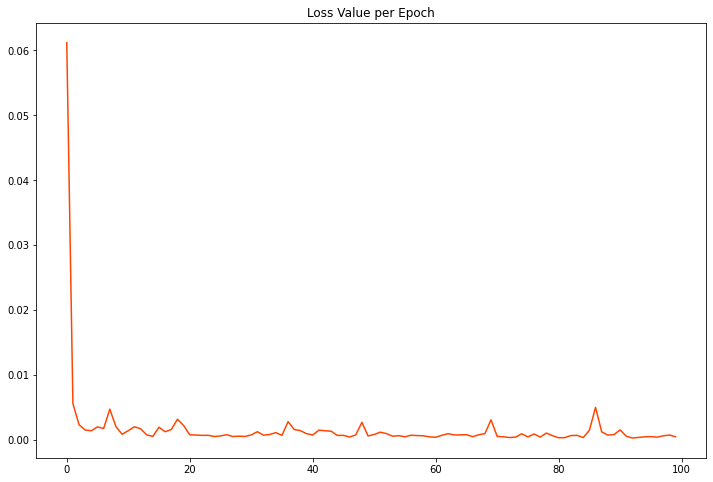

In [70]:
pd.DataFrame(results.history)['loss'].plot(title = 'Loss Value per Epoch', 
                                           color = 'orangered', 
                                           figsize = (12,8))

In [71]:
# Let's get the predictions from the data 
lstm_predictions_scaled = []
batch = scaled_test_data
current_batch = batch.reshape((1,n_inputs,n_features))
for i in range(len(test_data)):
  lstm_pred = lstm_model.predict(current_batch)[0]
  lstm_predictions_scaled.append(lstm_pred)
  current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]], axis = 1)

# scaler.inverse-transform - Reverse the scaling operation 
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))

In [72]:
# We can compare predicted and actual output
pd.concat([np.round(prediction), test_data.reset_index().drop(['index'],axis = 1)],axis = 1)
# We see that the prediction is not the best (1)

,0,Confirmed
0,5032942.0,5308014.0
1,5042251.0,5400619.0
2,5043205.0,5487580.0
3,5032615.0,5562663.0
4,5006572.0,5646010.0


**FBProphet Model**

This is an open source API for time series forecasting

In [74]:
# If not already installed
# !pip install fbprophet

In [75]:
from fbprophet import Prophet

In [76]:
prophet_model = Prophet(interval_width = 0.98,
                        daily_seasonality = True,
                        weekly_seasonality = True,
                        )

In [78]:
# Prepare data for FBProphet
prophet_df = pd.DataFrame(zip(list(covid_india.ObservationDate),
                              list(covid_india.Confirmed)),
                          columns = ['ds','y'])   # need to give these column names
prophet_df

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0
...,...,...
233,2020-09-19,5308014.0
234,2020-09-20,5400619.0
235,2020-09-21,5487580.0
236,2020-09-22,5562663.0


In [79]:
# Training model 
prophet_model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [80]:
# Forecasting for next 15 days
forecast_c = prophet_model.make_future_dataframe(periods = 15)
forecast_c

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
248,2020-10-04
249,2020-10-05
250,2020-10-06
251,2020-10-07


In [82]:
confirmed_forecast = prophet_model.predict(forecast_c)
confirmed_forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-2.854796e+03,-8.643231e+04,8.022833e+04
1,2020-01-31,-1.769732e+03,-8.584490e+04,8.132679e+04
2,2020-02-01,-2.232583e+02,-8.026854e+04,8.879757e+04
3,2020-02-02,-1.904628e+03,-8.321575e+04,8.671621e+04
4,2020-02-03,-2.422095e+03,-7.853906e+04,8.351876e+04
...,...,...,...,...
248,2020-10-04,6.350216e+06,6.235927e+06,6.470527e+06
249,2020-10-05,6.424853e+06,6.312392e+06,6.554322e+06
250,2020-10-06,6.501018e+06,6.362971e+06,6.626574e+06
251,2020-10-07,6.576472e+06,6.437248e+06,6.720890e+06


Figure(720x432)


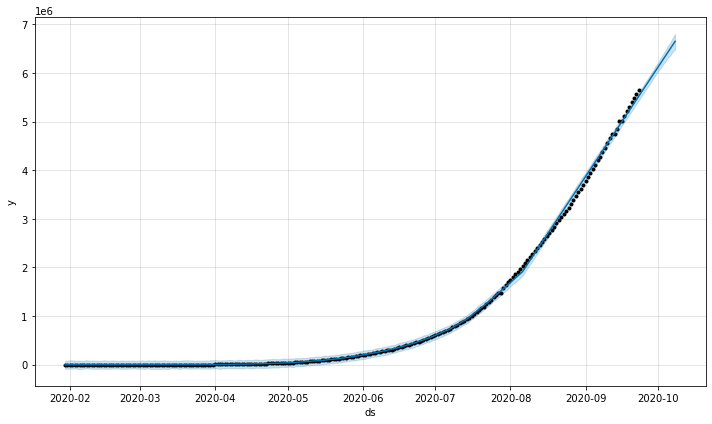

In [84]:
# We get the confidence intervals too
# We can plot it with confidence intervals
print(prophet_model.plot(confirmed_forecast))

In [85]:
# We see we get very good predictions

In [ ]:
# we can use folium to create interesting plots based on world location